In [ ]:
# !pip install geobr
# !pip install contextily

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geobr
import contextily as cx

%matplotlib inline

In [ ]:
biomas = geobr.read_biomes()
biomas

,name_biome,code_biome,year,geometry
0,Amazônia,1.0,2019.0,"MULTIPOLYGON (((-44.08515 -2.41669, -44.09068 ..."
1,Caatinga,2.0,2019.0,"MULTIPOLYGON (((-41.74080 -2.80826, -41.73291 ..."
2,Cerrado,3.0,2019.0,"MULTIPOLYGON (((-43.39009 -2.33937, -43.38741 ..."
3,Mata Atlântica,4.0,2019.0,"MULTIPOLYGON (((-48.70814 -28.44851, -48.71072..."
4,Pampa,5.0,2019.0,"MULTIPOLYGON (((-52.82472 -27.46295, -52.80293..."
5,Pantanal,6.0,2019.0,"MULTIPOLYGON (((-57.75946 -15.72779, -57.75659..."
6,Sistema Costeiro,NaN,2019.0,"MULTIPOLYGON (((-44.64799 -2.87038, -44.65184 ..."


In [ ]:
biomas.crc = "EPSG:4674"

In [ ]:
biomas_2019 = biomas[:6]

In [ ]:
municipios =  geobr.read_municipality(code_muni="PA", year=2022)
municipios.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1500107.0,Abaetetuba,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.90577 -1.95658, -48.53041 ..."
1,1500131.0,Abel Figueiredo,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.40371 -4.86731, -48.41237 ..."
2,1500206.0,Acará,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.37288 -1.48996, -48.38821 ..."
3,1500305.0,Afuá,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.54156 -0.67246, -50.53136 ..."
4,1500347.0,Água Azul do Norte,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.52826 -7.14526, -50.52192 ..."


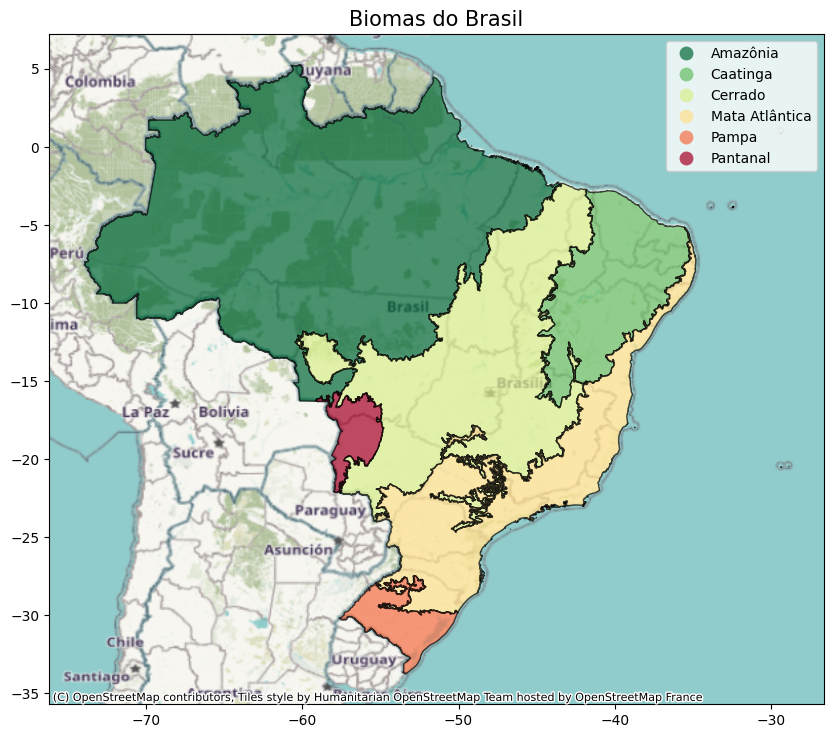

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

biomas_2019.plot(ax=ax, column='name_biome', cmap='RdYlGn_r', alpha=0.7,  edgecolor='Black', legend=True)
ax.set_title("Biomas do Brasil", fontsize=15)
cx.add_basemap(ax, crs=biomas_2019.crs)
plt.show()

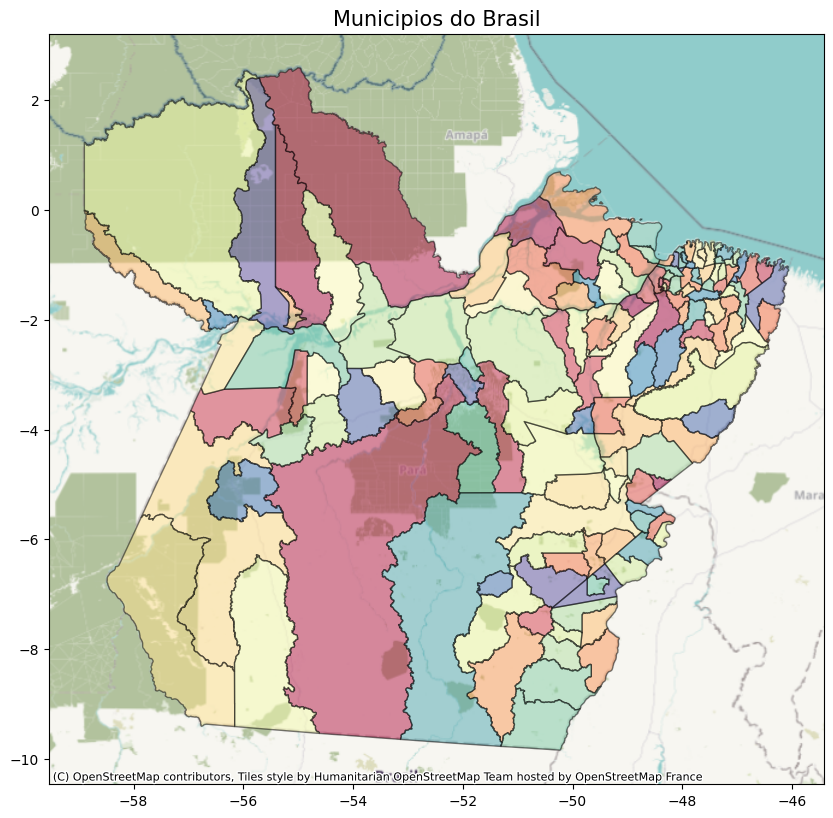

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

municipios.plot(ax=ax, column='name_muni', cmap='Spectral', alpha=0.5, edgecolor='Black')
ax.set_title("Municipios do Brasil", fontsize=15)
cx.add_basemap(ax, crs=municipios.crs)
plt.show()

In [ ]:
year = 2010
types = {
    'Biomas': biomas_2019,
    'Municipios': geobr.read_municipality(code_muni="PA", year=2022),
    'Micro Regions': geobr.read_conservation_units(),
    'Municipalities': geobr.read_municipality(code_muni='all', year=year)
}

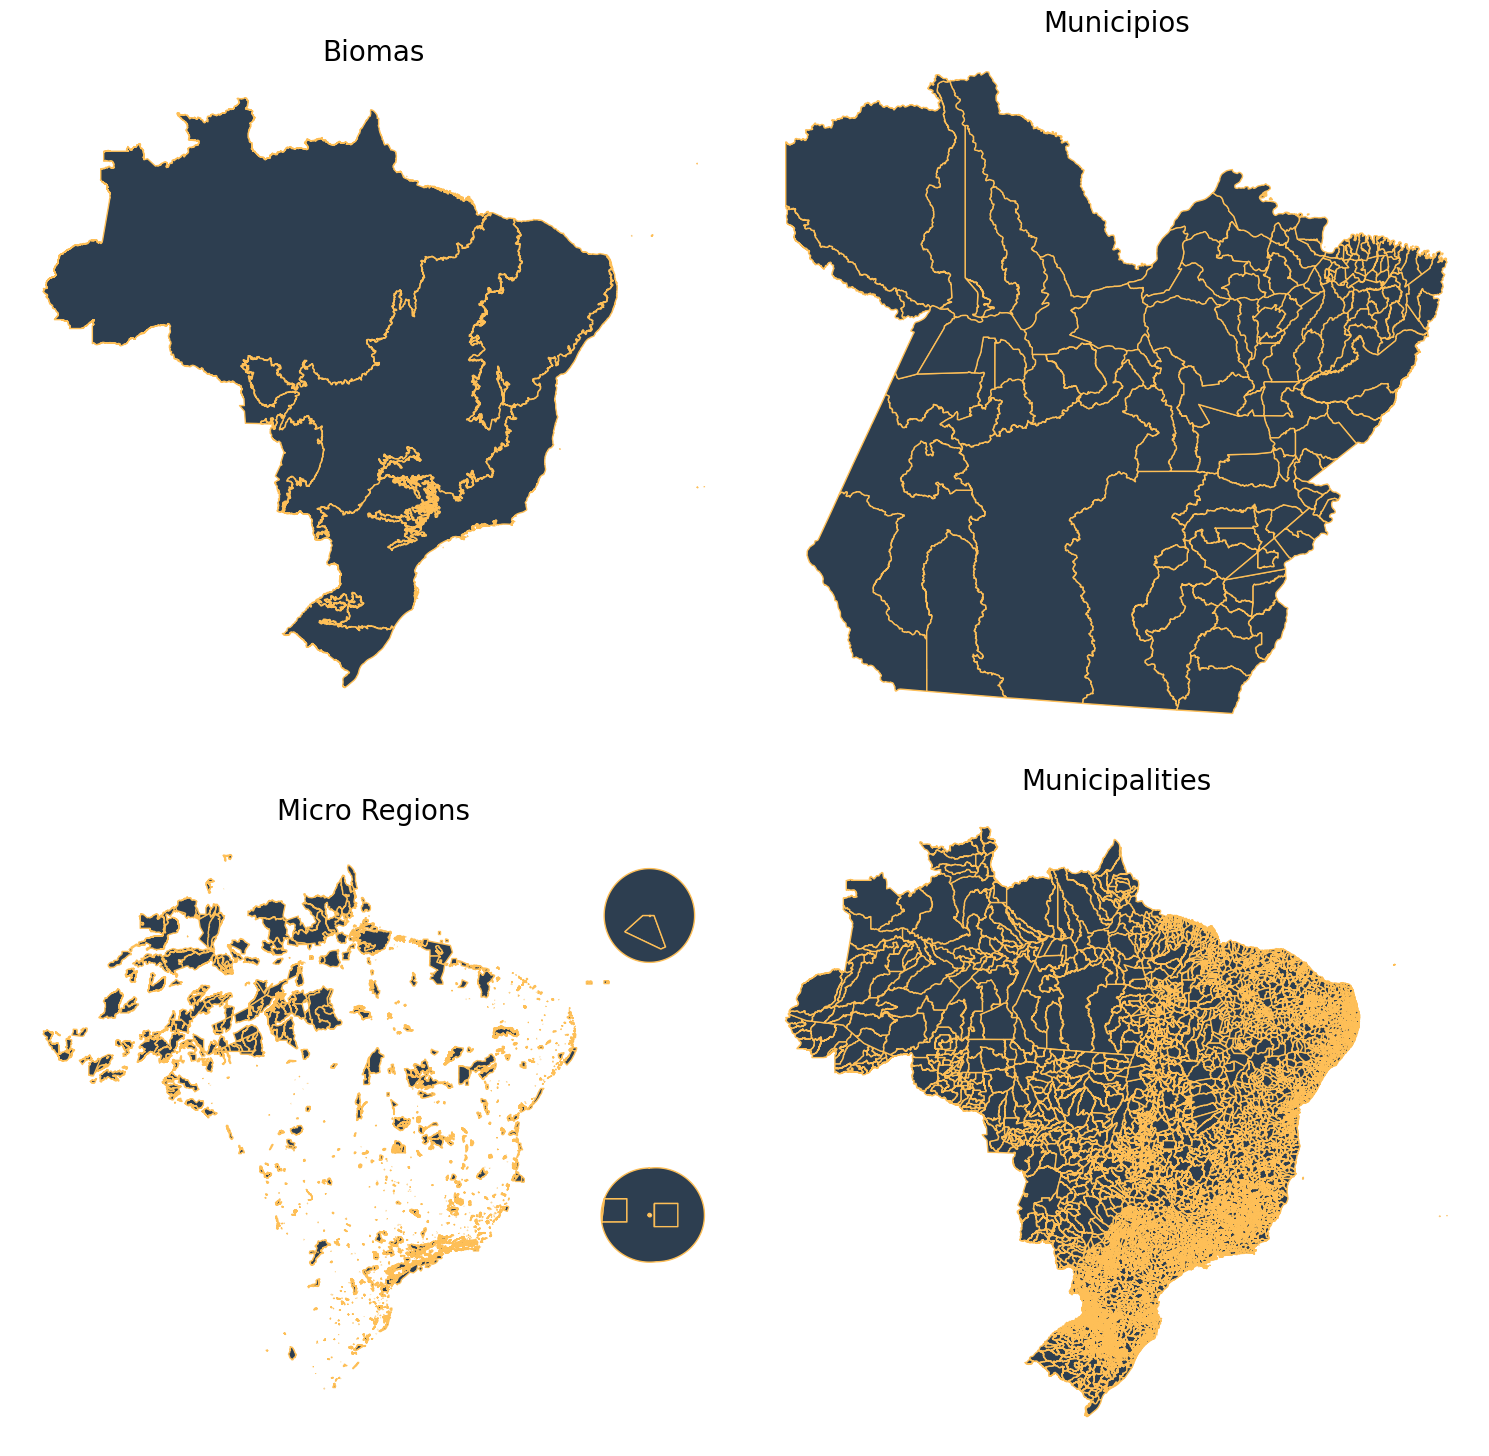

In [ ]:
nrows = 2
ncols = 2
fontsize = 20

fig, ax = plt.subplots(nrows=nrows, ncols=ncols,
                      figsize=(15, 15), dpi=100)

types_iter = iter(types.items())

for r in range(nrows):
    for c in range(ncols):

        axis = ax[r][c]
        name, df = next(types_iter)

        df.plot(facecolor='#2D3E50', edgecolor='#FEBF57', ax=axis)

        axis.set_title(name, fontsize=fontsize)
        axis.axis('off')

# General
fig.tight_layout()